# Programming Assignment 3 - Data Wrangling 

This assignment takes you through more learning of data wrangling. The content of the assignment may not exactly what we discussed in DataPreprocessing.ipynb, but there are places you can make use of material you learned in addition to learning new material. 

Out of sample optimization (OOS) is a method used in Neural Networks and Regression studies for market analysis. As a general practice, we divide data into "in-sample" (70%-80% of data from the middle of the entire time frame) and "out-of-sample" data (20%-30% of data of most recent and a first small portion of the total period). OOS optimizes parameters of the system algorithms on "in-sample" data and then test the accuracy of those parameters using "out-of-sample" data.

Walk-forward or Step-forward optimization is an OOS strategy that is used in finance to determine the best parameters to use in a trading strategy. In this strategy, "in-sample" is about 70%-80% of data of the first portion of the series, and the more recent 20%-30% is the "out-of-sample" data. 

Momentum investment is an investment strategy that follows the philosophy that more money could be made by "buying high and selling higher" than by buying underpriced stocks and waiting for the market to re-evaluate them. Momentum investing seeks to take advantage of market volatility by taking short-term positions in stocks going up and selling them as soon as they show signs of going down, then moving the capital to a new position. 

For example, let’s say we wanted to run a step-forward analysis of a very rudimentary momentum trading strategy that goes as follows:

- At the start of every month, we buy some cryptocurrency that had the largest price gain over the previous 7, 14, 21, or 28 days. We want to evaluate each of these time windows.

- Then, we hold for exactly 7 days and sell our position.

Well, this is not about investment strategies or optimization techniques. This is about data wrangling techniques and the ability to transform raw datasets into formats that help you answer interesting questions.

Here is what you need to accomplish. Follow step by step in numbered sections.

1) Download the dataset from  Files/DataFiles/crypto_sample.csv
This is given to you in the Zip file.

2) Read the dataset into a Pandas dataframe and display example observations. Change the display settings to display floats with 2 decimal places and expand the limits for the number of rows to 200 and columns to 100 to be displayed. Here is how you format and set display limits.

In [ ]:
# YOU CANNOT RUN THIS CODE!!!!  EXAMPLE ONLY!!!
# Display floats with 2 decimal places
pd.options.display.float_format = '{:,.2f}'.format
 
# Expand display limits
pd.options.display.max_rows = 200
pd.options.display.max_columns = 100


One of the most common reasons to wrangle data is when there's "too much" information packed into a single table, especially when dealing with time-series data.

Generally, all observations should be equivalent in granularity and in units.

There will be exceptions, but for the most part, this rule of thumb can save you from many headaches.

- Equivalence in Granularity - For example, you could have 10 rows of data from 10 different cryptocurrencies. However, you should not have the 11th row with average or total values from the other 10 rows. That 11th row would be an aggregation, and thus not equivalent in granularity to the other 10.

- Equivalence in Units - You could have 10 rows with prices in USD collected at different dates. However, you should not then have another 10 rows with prices quoted in EUR. Any aggregations, distributions, visualizations, or statistics would become meaningless.
Our current raw dataset breaks both of these rules!



Data Dictionary (for code GWA_BTC):

- Date: The day on which the index values were calculated.
- Open: The day's opening price index for Bitcoin in US dollars.
- High: The highest value for the price index for Bitcoin in US dollars that day.
- Low: The lowest value for the price index for Bitcoin in US dollars that day.
- Close: The day's closing price index for Bitcoin in US dollars.
- Volume: The volume of Bitcoin traded that day.
- VWAP: The volume-weighted average price of Bitcoin traded that day.
- TWAP: The time-weighted average price of Bitcoin traded that day.

MWA stands for "market-weighted average," and they show regional prices. There are multiple MWA codes for each cryptocurrency, one for each local fiat currency.

On the other hand, GWA stands for "global-weighted average," which shows globally indexed prices. GWA is thus an aggregation of MWA and not equivalent in granularity. (Note: only a subset of regional MWA codes are included in the sample dataset.)

Having different levels of granularity and/or different units makes analysis unwieldy at best, or downright impossible at worst.

So we have to fix these problems.

3) Filter unwanted observations
We know that GWA codes are aggregations of the regional MWA codes. Therefore, to perform our analysis, we only need to keep the global GWA codes. Write code to filter your data frame to keep only the records with GWA codes. You may  have to use the unique() and the isin() functions to make it easy to do this filtering. 
See

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html

Before filtering, there should be 31761 observations in the data set. 
After filtering, there should be 6309 observations in the data set with GWA codes. 
You can use the len() function to find the length of the data set. 

4) Pivot the data set

We need to calculate returns over the prior 7, 14, 21, and 28 days... for the first day of each month.
But the current data set is "stacked", rather than having to write helper functions with loops and other constructs, we can pivot the data set while keeping only one price column. For this assignment, let's keep the VWAP (volume weighted-average price) column. Store the pivoted data set in a separate data frame.

See

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

output a sample of the pivoted data set using the tail() function

Each column in your pivoted dataset should represent the price for one cryptocurrency and each row contains prices from one date. All the features should be aligned by date.

5) Shift the pivoted dataset.

To easily calculate returns over the prior 7, 14, 21, and 28 days, we can use Pandas's shift() function.

This function shifts the index of the dataframe by some number of periods. We can take advantage of this to calculate prior returns for our 7, 14, 21, 28-day windows.

For example, to calculate returns over the 7 days prior, we would need  prices_today / prices_7_days_ago - 1.0, which translates to:

In [ ]:
# YOU CANNOT RUN THIS CODE!!!! EXAMPLE ONLY!!!
#Calculate returns over 7 days prior
delta_7 = pivoted_df / pivoted_df.shift(7) - 1.0

Calculate returns for all of the windows [7, 14, 21, 28] using a loop and store the results in a dictionary. 
The dataset requires 2 assumptions to be met: (1) the observations are sorted ascending by date and (2) there are no missing dates. Make sure your data set meets these two assumptions.

6) Melt the shifted dataset.

Now that we've calculated returns using the pivoted dataset, we're going to "unpivot" the returns. By unpivoting, or melting the data, we can later create an analytical base table (ABT) where each row contains all of the relevant information for a particular coin on a particular date.

We couldn't directly shift the original dataset because the data for different coins were stacked on each other, so the boundaries would've overlapped. In other words, BTC data would leak into ETH calculations, ETH data would leak into LTC calculations, and so on.

To melt the data, you'll...

reset_index() so you can call the columns by name.
Call the melt() method.
Pass the column(s) to keep into the  id_vars= argument.
Name the melted column using the  value_name= argument.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html


Here is how you do it for one data frame.


In [ ]:
# Melt delta_7 returns
melted_7 = delta_7.reset_index().melt(id_vars=['Date'], value_name='delta_7')
 
# Melted dataframe examples
melted_7.tail()

You need to melt all the delta dataframes and store them in a list. 

Once this step (6) is done, you should have 4 melted dataframes stored in the "melted_dfs" list, one for each of the backward-looking 7, 14, 21, and 28-day returns. 

This will be our "target variable" for evaluating our trading strategy.


What to submit:

A Jupyter Notebook containing all the steps.
At each step you should output the content data structure using either head or tail functions.

The last output should look like this with more columns. 

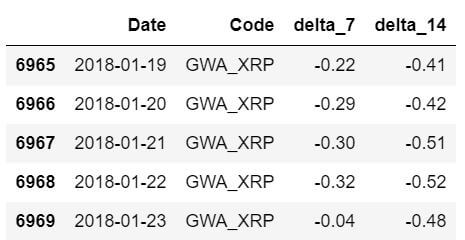
